# INSH 2102 Mini-Project 1: Martha Ballard's Diary

### The Project

Because Martha Ballard recorded a diary entry nearly every day for 27 years, historians are able to use her entries to create a picture of what life could be like in New England at the turn of the 19th century. In this project, our group intends to focus on one part of that picture. **We will investigate how the quality of the weather relates to occurrences of illness in Martha Ballard's town.** To do this, we will use a text-based approach, in which we parse the text data for each diary entry, searching for words relating to illness and various weather types, and establish a count of both for each day. With this data, we will be able to create graphs and tables to analyze the relationship, if it exists, between weather and sickness.

#### How to use the project:

First, create a fork of the GitHub repository. The repository already includes all diary entries needed in .txt form, as well as the notebook to process and analyze the data.

Next, you can interact with the Jupyter Notebook as you would normally. Run through all the code cells in order to see the process in action, and towards the bottom of the Notebook the code cells will start outputting line graphs and data tables to be analyzed.

### Pre-Processing
First we need to import the os and pandas modules. The os module is used to bring in data from text files stored in the local directories, and pandas is used to create DataFrames for analysis and data presentation.

In [46]:
import string
import os
import re
import pandas as pd
import numpy as np
from numpy import *
import math
import matplotlib.pyplot as plt
import seaborn as sns

Now we need to bring in the data found at https://cblevins.github.io/f19-dig-hist/homework/week-06-homework/. The data is in the form of a separate text file for each journal entry from the years 1804 and 1805.

We use the os module to generate a list in python containing each text file name as an element of the list.

We also set pandas to display all rows of any future DataFrames at this point.

In [47]:
pd.set_option('display.max_rows', None)
print(os.getcwd())
dirn = os.path.dirname(os.path.realpath('__file__'))

if not os.getcwd().endswith('diary'):
    path = os.path.join(dirn, 'diary')
    os.chdir(path)
    
year_1804 = []
year_1805 = []

all_entries = os.listdir()

C:\Users\tmitc\notebooks\mini-project\diary


With all the file names in our list, we loop through the list and read the text from each entry into new lists, one for 1804 and one for 1805. This is where we do some cleaning up of the data by removing the '#' and '$' characters and converting the entire text into lower case.



In [48]:
for f in all_entries:
    if f.startswith('1804'):
        entry = open(f, "r")
        year_1804.append(entry.read().lower().replace('#', '').replace('$', ''))
    elif f.startswith('1805'):
        entry = open(f, "r")
        year_1805.append(entry.read().lower().replace('#', '').replace('$', ''))

### Creating the Data Set
Now we create our DataFrame. Each row is an entry in the diary, and the only column so far is the actual text for that day.

In [49]:
entries_df = pd.DataFrame(year_1804, columns=["Text"])
print("")

This is where the bulk of our data work occurs. We need to generate a true/false boolean for each day for the following weather types: clear, warm, cloudy, snow, cold, windy, and raining. We read the text entry of each column and search for 1 or more keywords associated with each weather type, filling in true if found and false if not.

Because Martha Ballard put a description of the weather at the beginning of each diary entry, it was easy to find days where we had generated no true values for these weather types and determine if there was an error causing no weather to be found. This is how we identified common synonyms or misspellings that she used.

We also counted the number of times each day that she mentioned a word relating to sickness: 'ill', 'unwell', or 'sick'.

The last part is quantifying the weather for data analysis. Because we are primarily focused on bad weather, we decided to have a 'Bad Weather' column that gets a count of 1 for each column of Snow, Cold, or Raining that was true for that day. For example, a cold and rainy day would get a value of 2, whereas a cold day would only be a value of 1. One note is that when generating the true/false values for the weather, we considered a snowy day to automatically be cold, even if Martha did not explicitly mention the cold for that snowy day.

In [50]:
entries_df['Clear'] = entries_df.Text.str.contains('clear')
entries_df['Warm'] = entries_df.Text.str.contains('warm')
entries_df['Cloudy'] = entries_df.Text.str.contains('cloud')
entries_df['Snow'] = entries_df.Text.str.contains('snow')
entries_df['Cold'] = entries_df.Text.str.contains('|'.join(['cold', 'chill', 'snow', 'cool']))
entries_df['Windy'] = entries_df.Text.str.contains('|'.join(['wind', 'blowd', 'gust', 'blowed']))
entries_df['Raining'] = entries_df.Text.str.contains('|'.join(['rain', 'shower']))
entries_df['Bad Weather'] = entries_df.Snow.astype(int) + entries_df.Raining.astype(int) + entries_df.Cold.astype(int)
entries_df['Sick Count'] = entries_df.Text.str.count('sick') + entries_df.Text.str.count('unwel') + entries_df.Text.str.count('ill')
entries_df

,Text,Clear,Warm,Cloudy,Snow,Cold,Windy,Raining,Bad Weather,Sick Count
0,"cloudy, snowd at night. mr ballard and ephraim...",False,False,True,True,True,False,False,2,3
1,clear. mr ballard is gone to ye meddow. i feel...,True,False,False,False,False,True,False,0,2
2,snowd. son lambard conducted his wife and babe...,False,False,False,True,True,False,False,2,2
3,cloudy. son lambard came and conducted his wif...,False,False,True,False,False,False,False,0,1
4,clear and cold. son pollard brot his wife & tw...,True,False,False,False,True,False,False,1,2
5,clear. daughter ballard washt here for her sel...,True,False,False,False,False,False,False,0,0
6,clear and cool. i have felt so well as to help...,True,False,False,False,True,False,False,1,0
7,clear. rachel town to meeting afternoon and di...,True,False,False,False,False,False,False,0,0
8,snow storm. son pollard came with a covered sl...,False,False,False,True,True,False,False,2,0
9,cloudy. haman burr conducted rachel town from ...,False,False,True,False,False,False,False,0,2



### Analysis
We wanted to analyze the relationship between inclement weather and the general quantity of sick people mentioned in the diary. Instead of keeping the data in a daily form, we decided to group the 'sick counts' and 'bad weather counts' into weeks, where the value for each week would simply be the sum of the counts for the 7 days in the week.

To do this we create a second DataFrame that loops through the first DataFrame and adds the rows for each week along the way.

In [51]:
def get_weekly_totals(df):
    records = []
    for i in range(52):
        bad_weather_total = 0
        sick_total = 0
        clear_total = 0
        week = i + 1
        
        for j in range(7):
            bad_weather_total += df.iloc[(i * 7) + j]['Bad Weather']
            sick_total += df.iloc[(i * 7) + j]['Sick Count']
            clear_total += df.iloc[(i * 7) + j]['Clear']
        
        records.append([week, bad_weather_total, sick_total, clear_total])
    
    return pd.DataFrame.from_records(records, columns=['Week', 'Bad Weather', 'Sick', 'Clear'])

weekly = get_weekly_totals(entries_df)
weekly

,Week,Bad Weather,Sick,Clear
0,1,6,10,4
1,2,4,3,4
2,3,7,6,4
3,4,7,2,6
4,5,7,2,5
5,6,2,2,6
6,7,2,3,7
7,8,4,5,6
8,9,7,5,4
9,10,4,6,5


By merging the data into weekly rows, we can begin to see a slightly clearer picture of the data. We can now see that in the last few weeks of the year (end of December) and the first dozen-or-so weeks of the year (January - March), the 'Bad Weather' count is consistently higher than in the weeks closer to the middle of the year (end of spring, summer, start of fall).

It is not easy to detect a clear trend in the 'Sick Count' data yet. One thing we can observe is that the peaks in the data for sickness occur in the first week of January and the first week of October. The latter peak corresponds to a period in which Martha herself was quite ill, and naturally mentioned it quite a lot.

Let's see if we can get a better idea of the data by creating some line graphs.

### Line Graph

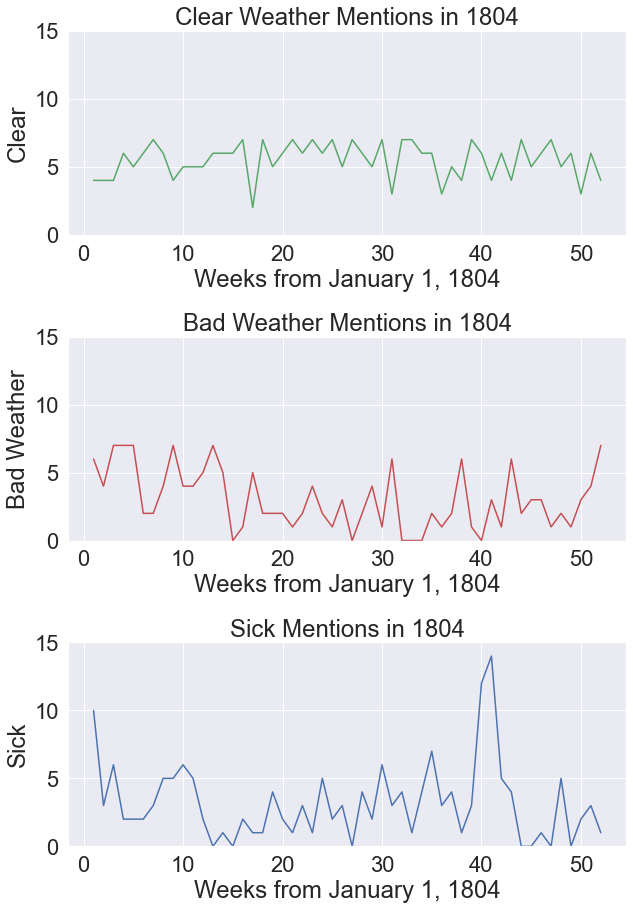

In [52]:
# set the font scale to 2
sns.set(font_scale=2)

# create the lists for plotting
mention_list = ['Clear', 'Bad Weather', 'Sick']
graph_list = ['Clear Weather', 'Bad Weather', 'Sick']
color_list = ['g', 'r', 'b']

# set 52 spaces between 1 and 52
bins = np.linspace(1, 52, 52)

for mention_count in range(len(mention_list)):
    # get current list
    mention = mention_list[mention_count]
    color = color_list[mention_count]
    
    # plot the measure for each plot by week
    plt.subplot(3, 1, mention_count + 1)
    plt.plot(weekly['Week'], weekly[mention], c=color, alpha=1)
    
    # label the x axis
    plt.xlabel('Weeks from January 1, 1804')
    
    # label the y axis
    plt.ylabel(mention)
    
    # set the domain of the y axis from 0 to 15
    plt.ylim(0, 15)
        
    # set the titles for the subplots
    plt.gca().title.set_text(graph_list[mention_count] + ' Mentions in 1804')
    
    # set the size of the plots to be 10 by 5
    plt.gcf().set_size_inches(10, 15)
    
    # adjust spacing for plots
    plt.subplots_adjust(wspace=.3, hspace=.5)

### Bar Graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
 

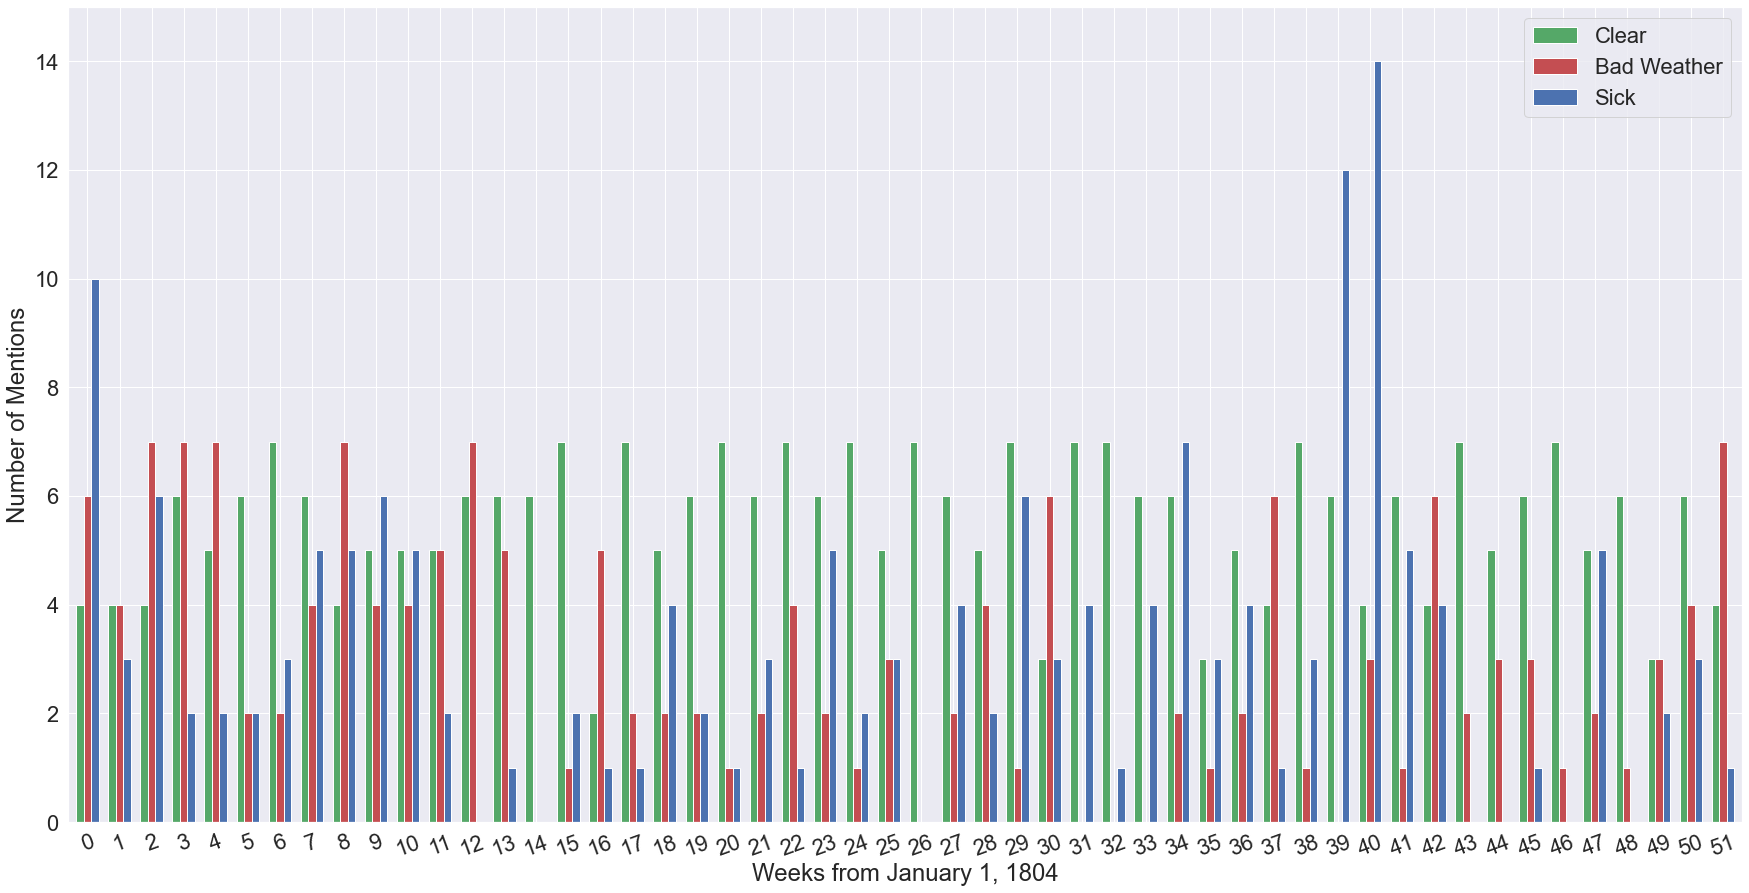

In [53]:
# set the font scale to 2
sns.set(font_scale=2)

# create the bar graph
weekly[['Clear', 'Bad Weather', 'Sick']].plot(kind='bar', figsize=(20, 10), width=0.7, color=['g', 'r', 'b'])

# label the x axis
plt.xlabel('Weeks from January 1, 1804')
    
# label the y axis
plt.ylabel('Number of Mentions')
    
# set the domain of the y axis from 0 to 15
plt.ylim(0, 15)
    
# set the size of the plots to be 10 by 5
plt.gcf().set_size_inches(30, 15)

# set the labels diagonal on x axis
plt.xticks(rotation=20)